

## Описание проекта

Есть данные от Яндекс.Афиши за период 12 месяцев - с июня 2017 по конец мая 2018 года:
 - лог сервера с данными о посещениях сайта Яндекс.Афиши: время начала и окончания каждой сесии, устройство, с которого зашли, какой рекламный источник привлек трафик, уникальный номер посетителя;
 - выгрузка всех заказов за этот период: время покупки, сумма покупки, уникальный номер посетителя;
 - статистика рекламных расходов: источник трафика, расходы на привлечение, дата расходов. 

Цели: 
- изучить поведение посетителей и покупателей в разрезе кагорт - месяца, когда они впервые посетили сайт или совершили покупку. 
- проанализировать эффективность маркетинговых активностей и дать рекомендации маркетологам Яндекс.Афиши как оптимизировать маркетинговые затраты - на какие источники целесрообразно тратить деньги, а какие неэффективны и требуют пересмотра стратегии.


## Шаг 1. Загрузите данные и подготовьте их к анализу

Загрузка и проверка файлов:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt


visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

In [2]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [3]:
visits.columns

Index(['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid'], dtype='object')

Переименуем названия столбцов в более традиционные для пайтона (в таблице orders аналогично):

In [4]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']

In [5]:
visits.dtypes

device       object
end_ts       object
source_id     int64
start_ts     object
uid          uint64
dtype: object

In [6]:
visits.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


Тип данных у полей время посещения сайта object, изменим его на тип дата:

In [7]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format = '%Y-%m-%d %H:%M:%S')

In [8]:
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format = '%Y-%m-%d %H:%M:%S')

In [9]:
visits.dtypes

device               object
end_ts       datetime64[ns]
source_id             int64
start_ts     datetime64[ns]
uid                  uint64
dtype: object

In [10]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [11]:
orders.columns = ['buy_ts', 'revenue', 'uid']

In [12]:

orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format = '%Y-%m-%d %H:%M:%S')
orders.sample(10)

,buy_ts,revenue,uid
41147,2018-03-22 13:46:00,2.20,3313199438078449596
28032,2018-01-04 14:05:00,2.20,16472747197828363855
30759,2018-01-24 08:43:00,1.83,3059398465794981707
38283,2018-03-05 12:55:00,2.44,9612465643039953050
13276,2017-10-17 21:18:00,1.53,10514662082185234664
171,2017-06-02 17:17:00,2.69,15115462973614029728
18746,2017-11-21 20:24:00,3.05,1256383229522249585
18805,2017-11-22 10:45:00,51.33,13917100247827877905
29028,2018-01-12 08:33:00,6.72,4972946660711405763
26247,2017-12-26 18:00:00,0.37,15288486172889253680


In [13]:
orders.dtypes

buy_ts     datetime64[ns]
revenue           float64
uid                uint64
dtype: object

In [14]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [15]:
costs.dtypes

source_id      int64
dt            object
costs        float64
dtype: object

In [16]:
costs['dt'] = pd.to_datetime(costs['dt'])

проверим дубликаты в таблицах:

In [17]:
visits.duplicated().sum()

0

In [18]:
orders.duplicated().sum()

0

In [19]:
costs.duplicated().sum()

0

Выводы: был изменен формат столбцов с временем с object на формат дат, переименованы названия столбцов, дубликатов в файлах нет

## Шаг 2. Постройте отчёты и посчитайте метрики

### Продуктовые метрики
 - Рассчитайте DAU, WAU и MAU. Вычислите средние значения этих метрик за весь период. Отобразите изменения метрик во времени на графиках;
 - Определите, сколько раз за день пользователи в среднем заходят на сайт. Постройте график, отражающий изменения метрики во времени;
 - Исследуйте, сколько времени пользователи проводят на сайте. Узнайте продолжительность типичной пользовательской сессии за весь период. Чтобы выбрать подходящую среднюю меру, постройте график распределения. Изменение продолжительности сессий во времени изучать необязательно
 - Рассчитайте Retention Rate, применяя когортный анализ. Покажите изменения метрики во времени на графике. Найдите средний Retention Rate на второй месяц «жизни» когорт


1. Посчитаем DAU, WAU и MAU:

In [20]:
visits['year'] = visits['start_ts'].dt.year
visits['month'] = visits['start_ts'].dt.month
visits['week'] = visits['start_ts'].dt.week
visits['date'] = visits['start_ts'].dt.date


In [21]:

dau = visits.groupby('date').agg({'uid': 'nunique'}).mean().round(0)
wau = visits.groupby(['year', 'week']).agg({'uid': 'nunique'}).mean().round(0)
mau = visits.groupby(['year', 'month']).agg({'uid': 'nunique'}).mean().round(0)

In [22]:
dau

uid    908.0
dtype: float64

In [23]:
mau

uid    23228.0
dtype: float64

In [24]:
wau

uid    5716.0
dtype: float64

Построим график изменения кол-ва пользователей на примере wau:

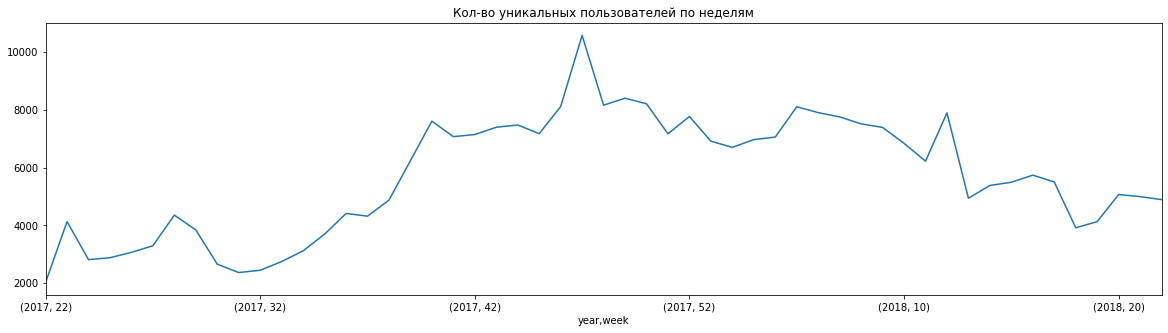

In [25]:
wau_table=visits.groupby(['year', 'week']).agg({'uid': 'nunique'})
wau_table.plot(figsize=(20,5),title='Кол-во уникальных пользователей по неделям', legend = False);

In [26]:
wau_table.sort_values('uid', ascending=False).head(10)

uid
year week       
2017 47    10586
     49     8407
     50     8214
     48     8166
     46     8117
2018 5      8111
     6      7908
     12     7898
2017 52     7774
2018 7      7759

Пики посещения сайта приходятся на конец 2017 г. Посмотрим график по дням

In [27]:
dau_table = visits.groupby(['date', 'week','year']).agg({'uid': 'nunique'}).reset_index()
dau_table.sort_values('uid', ascending=False).head(10)

,date,week,year,uid
176,2017-11-24,47,2017,3319
363,2018-05-31,22,2018,1997
177,2017-11-25,47,2017,1817
245,2018-02-01,5,2018,1640
298,2018-03-26,13,2018,1609
168,2017-11-16,46,2017,1604
179,2017-11-27,48,2017,1571
299,2018-03-27,13,2018,1551
297,2018-03-25,12,2018,1545
189,2017-12-07,49,2017,1524


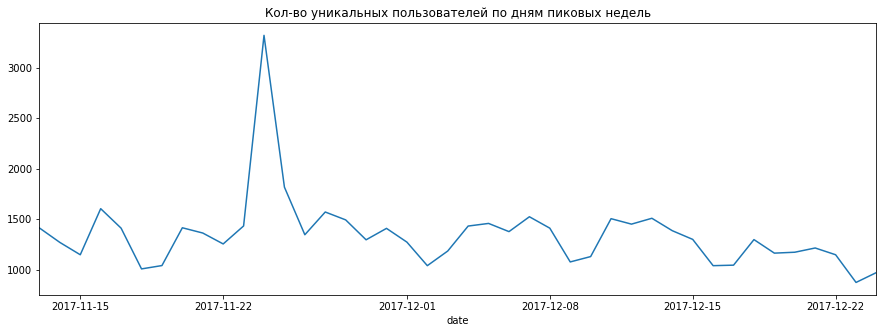

In [28]:
dau_table.query('week > 45 and week <52 and year == 2017').plot(figsize=(15,5),title='Кол-во уникальных пользователей по дням пиковых недель', legend = False, x='date', y='uid');

Какое-то событие 24 ноября 2017 спровоцировало 2-х - 3-х кратный рост кол-ва пользователей

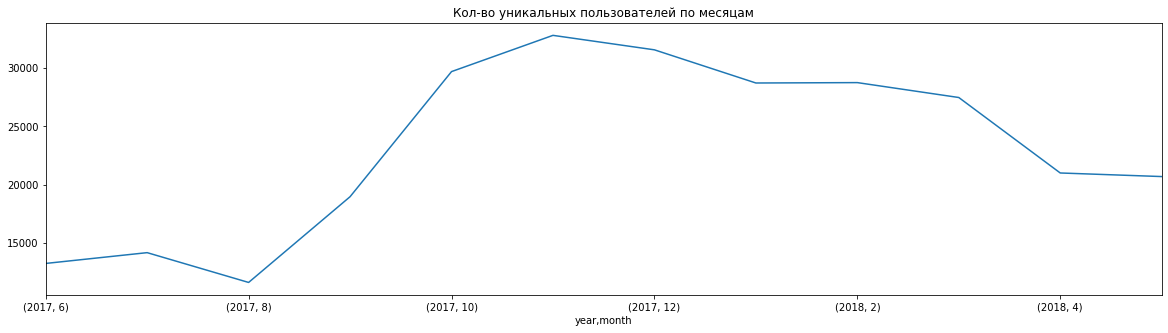

In [29]:
mau_table=visits.groupby(['year', 'month']).agg({'uid': 'nunique'})
mau_table.plot(figsize=(20,5),title='Кол-во уникальных пользователей по месяцам', legend = False);

На графике MAU заметен рост кол-ва уникальных пользователей с октября и снижение в апреле. 

2. Посчитаем количество сессий в день (на пользователя):

In [30]:
sessions = visits.groupby('date').agg({'uid': 'count'}).mean()
sessions

uid    987.362637
dtype: float64

In [31]:
sessions_by_user = sessions / dau
sessions_by_user.round(2)

uid    1.09
dtype: float64

В среднем в течении дня 9% пользователей заходят на сайт повторно.

Построим график количество сессий в день (на пользователя): 

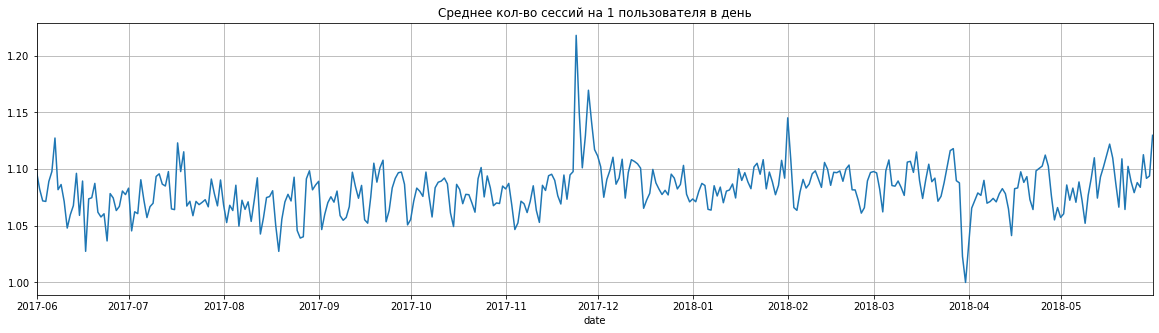

In [32]:
sessions_for_graph = visits.groupby('date').agg({'uid': 'nunique','start_ts':'count'})
sessions_for_graph ['qty_per_day'] = sessions_for_graph['start_ts'] / sessions_for_graph['uid']
sessions_for_graph.plot(y='qty_per_day',figsize=(20,5),title='Среднее кол-во сессий на 1 пользователя в день',
                        legend = False, grid = True);

3. Посчитаем длительность 1 сессии:

In [33]:
visits['duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

In [34]:
visits['duration'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: duration, dtype: float64

In [35]:
visits.head()

,device,end_ts,source_id,start_ts,uid,year,month,week,date,duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0


Удалим экстемумы (>1 часа) и нулевые значения:

In [36]:
visits.drop(visits.query('duration <=0 or duration >=3600').index, inplace=True)
visits

,device,end_ts,source_id,start_ts,uid,year,month,week,date,duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,60
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018,1,5,2018-01-30,3360
...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017,7,30,2017-07-29,19
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018,1,4,2018-01-25,19
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018,3,9,2018-03-03,19
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017,11,44,2017-11-02,19


In [37]:
visits['duration'].describe()

count    317041.000000
mean        615.527746
std         672.420361
min          19.000000
25%         120.000000
50%         360.000000
75%         900.000000
max        3540.000000
Name: duration, dtype: float64

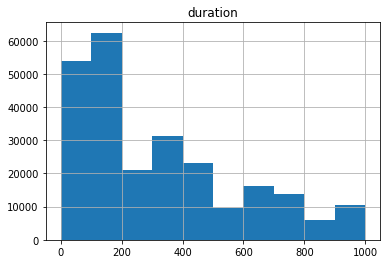

In [38]:
visits.hist('duration', range = (0,1000));

Отклонение от среднего значения достаточно высокое (std = 672), и на графике видно, где сконцентрированы значения. Поэтому в качестве среднего нужно взять медиану = 360с, т.е.,6 мин. 

4. Посчитаем Retention Rate.
Разобъем посетителей сайта на когорты в соответствии с первым месяцем посещения:

In [39]:
first_visit_date = visits.groupby(['uid'])['start_ts'].min()
first_visit_date.name = 'first_visit_date'
visits = visits.join(first_visit_date, on='uid')


In [40]:
visits['first_visit_month'] = visits['first_visit_date'].astype('datetime64[M]')
visits['visit_month'] = visits['start_ts'].astype('datetime64[M]')
visits.head()

,device,end_ts,source_id,start_ts,uid,year,month,week,date,duration,first_visit_date,first_visit_month,visit_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,2018-02-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09 20:05:00,2018-03-01,2018-05-01
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,60,2017-09-03 21:35:00,2017-09-01,2017-09-01
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018,1,5,2018-01-30,3360,2017-06-29 09:00:00,2017-06-01,2018-01-01


In [41]:
visits['cohort_lifetime'] = visits['visit_month']-visits['first_visit_month']
visits['cohort_lifetime'] = visits['cohort_lifetime']/np.timedelta64(1, 'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')
visits.head()


,device,end_ts,source_id,start_ts,uid,year,month,week,date,duration,first_visit_date,first_visit_month,visit_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,2018-02-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09 20:05:00,2018-03-01,2018-05-01,2
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,60,2017-09-03 21:35:00,2017-09-01,2017-09-01,0
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018,1,5,2018-01-30,3360,2017-06-29 09:00:00,2017-06-01,2018-01-01,7


In [42]:
cohorts = visits.groupby(['first_visit_month', 'cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
cohorts.head()

,first_visit_month,cohort_lifetime,uid
0,2017-06-01,0,11825
1,2017-06-01,1,894
2,2017-06-01,2,601
3,2017-06-01,3,708
4,2017-06-01,4,770


In [43]:
initial_users_count=cohorts[cohorts['cohort_lifetime'] == 0][['first_visit_month','uid']]

initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

initial_users_count.head()

,first_visit_month,cohort_users
0,2017-06-01,11825
12,2017-07-01,11778
23,2017-08-01,9181
33,2017-09-01,15054
42,2017-10-01,23396


In [44]:
cohorts = cohorts.merge(initial_users_count, on='first_visit_month')

cohorts.head()

,first_visit_month,cohort_lifetime,uid,cohort_users
0,2017-06-01,0,11825,11825
1,2017-06-01,1,894,11825
2,2017-06-01,2,601,11825
3,2017-06-01,3,708,11825
4,2017-06-01,4,770,11825


In [45]:
cohorts['first_visit_month'] = pd.to_datetime(cohorts['first_visit_month']).dt.date
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users'] 

cohorts.head()

,first_visit_month,cohort_lifetime,uid,cohort_users,retention
0,2017-06-01,0,11825,11825,1.000000
1,2017-06-01,1,894,11825,0.075603
2,2017-06-01,2,601,11825,0.050825
3,2017-06-01,3,708,11825,0.059873
4,2017-06-01,4,770,11825,0.065116


In [46]:
retention_pivot = cohorts.pivot_table(index='first_visit_month', values='retention', columns='cohort_lifetime', aggfunc='sum')
retention_pivot.fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06-01,1.0,0.0756025,0.0508245,0.0598732,0.0651163,0.0668922,0.057759,0.0557294,0.0505708,0.0494715,0.0379704,0.0437209
2017-07-01,1.0,0.0540839,0.0497538,0.0554424,0.0562065,0.0461878,0.0436407,0.0436407,0.0376125,0.0272542,0.0269995,
2017-08-01,1.0,0.0734125,0.0597974,0.0594706,0.0472715,0.0408452,0.035726,0.0371419,0.0269034,0.0241804,,
2017-09-01,1.0,0.0824366,0.0672247,0.0489571,0.0377308,0.0368673,0.0346752,0.0228511,0.0225854,,,
2017-10-01,1.0,0.076808,0.0503932,0.0371004,0.0332108,0.0309455,0.0208583,0.0194478,,,,
2017-11-01,1.0,0.0767668,0.0421831,0.0375097,0.0323079,0.021376,0.0201975,,,,,
2017-12-01,1.0,0.0544546,0.0361277,0.0298579,0.0193353,0.0175816,,,,,,
2018-01-01,1.0,0.0572002,0.0375789,0.0242208,0.019083,,,,,,,
2018-02-01,1.0,0.0551604,0.024372,0.0192489,,,,,,,,


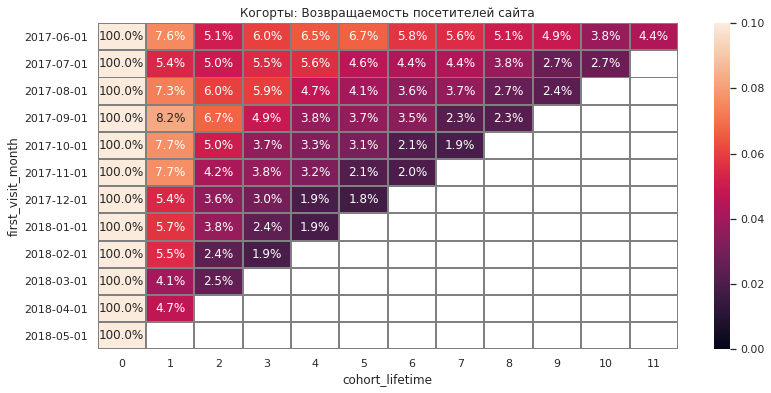

In [47]:
sns.set(style='white')
plt.figure(figsize=(13, 6))
plt.title('Когорты: Возвращаемость посетителей сайта')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmin=0, vmax=0.1);

Посмотрим средний Retention Rate на второй месяц «жизни» когорт:

In [48]:
retention_pivot.describe()

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
count,12.0,11.000000,10.000000,9.000000,8.000000,7.000000,6.000000,5.000000,4.000000,3.000000,2.000000,1.000000
mean,1.0,0.063056,0.044335,0.041298,0.038783,0.037242,0.035476,0.035762,0.034418,0.033635,0.032485,0.043721
std,0.0,0.014239,0.013974,0.015308,0.016516,0.016584,0.014220,0.014963,0.012485,0.013800,0.007758,NaN
min,1.0,0.040612,0.024372,0.019249,0.019083,0.017582,0.020198,0.019448,0.022585,0.024180,0.026999,0.043721
25%,1.0,0.054269,0.036490,0.029858,0.029065,0.026161,0.024312,0.022851,0.025824,0.025717,0.029742,0.043721
50%,1.0,0.057200,0.045968,0.037510,0.035471,0.036867,0.035201,0.037142,0.032258,0.027254,0.032485,0.043721
75%,1.0,0.076185,0.050717,0.055442,0.049505,0.043517,0.041662,0.043641,0.040852,0.038363,0.035228,0.043721
max,1.0,0.082437,0.067225,0.059873,0.065116,0.066892,0.057759,0.055729,0.050571,0.049471,0.037970,0.043721


Среднее значение RR для 2-го месяца жизни кагорт (т.е., cohort_lifetime=1 ) - 6,3%. Дальнейшая тенденция - убывание RR - всё меньше людей возвращаются на сайт с течением времени первого посещения.
Есть более успешные кагорты, где отток меньше всего - июнь-сент. Начиная с декабря - RR в разрезе # месяца жизни значительно ниже.

### Метрики электронной коммерции
 - Когда люди начинают покупать (через сколько времени)
 - Применяя когортный анализ или другой метод, рассчитайте среднее количество покупок на одного покупателя за определённый период, например за 6 месяцев
 - Какой средний чек?
 применяя группировку по времени совершения покупки. Когортный анализ не подходит — он может исказить расчёты. Постройте график, отражающий изменения метрики во времени;
 - Сколько денег приносят? (LTV, margin rate = 100%)
 Выясните, как меняется LTV на покупателя по когортам. Помните, что LTV — накопительная метрика. Рассчитайте средний LTV по когортам за 6 месяцев; в расчёт включайте когорты, «прожившие» не менее 6 месяцев. Маржинальность сервиса — 100%. Отразите изменения метрики во времени на графике;

1. Посчитаем через сколько времени после первого визита люди совершают первый заказ:

In [49]:
orders.sample(5)

,buy_ts,revenue,uid
22046,2017-12-05 12:53:00,3.89,8420559579284182686
46622,2018-05-07 18:14:00,1.83,3916163593186582940
5328,2017-08-14 15:35:00,4.40,8547733390884206624
6645,2017-09-02 13:57:00,1.22,1439399833849650830
39069,2018-03-08 20:00:00,1.83,8571806566515250268


In [50]:
first_order_date = orders.groupby('uid')['buy_ts'].min() 
first_order_date.name = 'first_order_date'
orders = orders.join(first_order_date, on='uid')
orders = orders.join(first_visit_date, on='uid')

In [51]:
orders

,buy_ts,revenue,uid,first_order_date,first_visit_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,2018-05-31 09:11:00
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,2018-05-31 23:05:00
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-31 23:52:00
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2017-10-23 12:32:00


In [52]:
orders['days_between_visit_order'] = orders['first_order_date'] - orders['first_visit_date']
orders['for_calc'] = (orders ['first_order_date'] >= orders ['first_visit_date'])*1

Удаляем строки с ошибками, где первая покупка совершена раньше, чем был первый визит

In [53]:
orders.drop(orders.query('for_calc==0').index, inplace=True)
orders

,buy_ts,revenue,uid,first_order_date,first_visit_date,days_between_visit_order,for_calc
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,0 days 00:01:00,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,0 days 00:11:00,1
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,0 days 00:02:00,1
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,0 days 00:15:00,1
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,0 days 00:27:00,1
...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,2018-05-31 09:11:00,0 days 14:39:00,1
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,2018-05-31 23:05:00,0 days 00:45:00,1
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-31 23:52:00,0 days 00:02:00,1
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2017-10-23 12:32:00,220 days 11:24:00,1


In [54]:
orders.describe()

,revenue,uid,days_between_visit_order,for_calc
count,47749.000000,4.774900e+04,47749,47749.0
mean,4.979657,9.083037e+18,17 days 03:08:21.537623,1.0
std,22.310461,5.308839e+18,45 days 18:22:10.205722,0.0
min,0.000000,3.135781e+14,0 days 00:00:00,1.0
25%,1.220000,4.472815e+18,0 days 00:04:00,1.0
50%,2.440000,9.070416e+18,0 days 00:18:00,1.0
75%,4.890000,1.370744e+19,4 days 01:20:00,1.0
max,2633.280000,1.844617e+19,363 days 07:04:00,1.0


Медианное значение через сколько времени люди начинают покупать - 18 мин

2. Рассчитаем среднее количество покупок на одного покупателя за определённый период, например за 6 месяцев

In [55]:
orders_qty=orders.groupby('uid')['buy_ts'].count().mean()

In [56]:
orders_qty=orders.groupby('uid')['buy_ts'].count().mean()

In [57]:
print('среднее количество покупок на одного покупателя:', orders_qty.round(2))

среднее количество покупок на одного покупателя: 1.37


2-й вариант с помощью кагортного анализа:

In [58]:
orders

,buy_ts,revenue,uid,first_order_date,first_visit_date,days_between_visit_order,for_calc
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,0 days 00:01:00,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,0 days 00:11:00,1
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,0 days 00:02:00,1
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,0 days 00:15:00,1
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,0 days 00:27:00,1
...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,2018-05-31 09:11:00,0 days 14:39:00,1
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,2018-05-31 23:05:00,0 days 00:45:00,1
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-31 23:52:00,0 days 00:02:00,1
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2017-10-23 12:32:00,220 days 11:24:00,1


In [59]:
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')


In [60]:
orders['cohort_lifetime'] = orders['order_month']-orders['first_order_month']
orders['cohort_lifetime'] = orders['cohort_lifetime']/np.timedelta64(1, 'M')
orders['cohort_lifetime'] = orders['cohort_lifetime'].round().astype('int')
orders.head()

,buy_ts,revenue,uid,first_order_date,first_visit_date,days_between_visit_order,for_calc,first_order_month,order_month,cohort_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,00:01:00,1,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,00:11:00,1,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,00:02:00,1,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,00:15:00,1,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,00:27:00,1,2017-06-01,2017-06-01,0


In [61]:
cohorts = orders.groupby(['first_order_month', 'cohort_lifetime']).agg({'buy_ts':'count','uid':'nunique','revenue':'sum'}).reset_index()
cohorts

,first_order_month,cohort_lifetime,buy_ts,uid,revenue
0,2017-06-01,0,2255,1950,9066.68
1,2017-06-01,1,166,58,944.18
2,2017-06-01,2,157,47,816.86
3,2017-06-01,3,166,50,1415.39
4,2017-06-01,4,239,83,1757.76
...,...,...,...,...,...
74,2018-03-01,2,156,53,1063.95
75,2018-04-01,0,2412,2196,10289.95
76,2018-04-01,1,195,69,1209.92
77,2018-05-01,0,3131,2879,13178.36


In [62]:
initial_users_count=cohorts[cohorts['cohort_lifetime'] == 0][['first_order_month','uid']]

initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

initial_users_count

,first_order_month,cohort_users
0,2017-06-01,1950
12,2017-07-01,1854
23,2017-08-01,1317
33,2017-09-01,2489
42,2017-10-01,4169
50,2017-11-01,3844
57,2017-12-01,4151
63,2018-01-01,3216
68,2018-02-01,3512
72,2018-03-01,3380


In [63]:
cohorts = cohorts.merge(initial_users_count, on='first_order_month')

cohorts

,first_order_month,cohort_lifetime,buy_ts,uid,revenue,cohort_users
0,2017-06-01,0,2255,1950,9066.68,1950
1,2017-06-01,1,166,58,944.18,1950
2,2017-06-01,2,157,47,816.86,1950
3,2017-06-01,3,166,50,1415.39,1950
4,2017-06-01,4,239,83,1757.76,1950
...,...,...,...,...,...,...
74,2018-03-01,2,156,53,1063.95,3380
75,2018-04-01,0,2412,2196,10289.95,2196
76,2018-04-01,1,195,69,1209.92,2196
77,2018-05-01,0,3131,2879,13178.36,2879


In [64]:
cohorts['first_order_month'] = pd.to_datetime(cohorts['first_order_month']).dt.date
cohorts['qty_pur'] = cohorts['buy_ts']/ cohorts['cohort_users']
cohorts

,first_order_month,cohort_lifetime,buy_ts,uid,revenue,cohort_users,qty_pur
0,2017-06-01,0,2255,1950,9066.68,1950,1.156410
1,2017-06-01,1,166,58,944.18,1950,0.085128
2,2017-06-01,2,157,47,816.86,1950,0.080513
3,2017-06-01,3,166,50,1415.39,1950,0.085128
4,2017-06-01,4,239,83,1757.76,1950,0.122564
...,...,...,...,...,...,...,...
74,2018-03-01,2,156,53,1063.95,3380,0.046154
75,2018-04-01,0,2412,2196,10289.95,2196,1.098361
76,2018-04-01,1,195,69,1209.92,2196,0.088798
77,2018-05-01,0,3131,2879,13178.36,2879,1.087530


In [65]:
qty_pur_pivot = cohorts.pivot_table(index='first_order_month', values='qty_pur', columns='cohort_lifetime', aggfunc='sum').groupby(level=0).cumsum(axis=1)
qty_pur_pivot.fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.156410,1.24154,1.32205,1.40718,1.52974,1.62462,1.74308,1.81641,1.90154,1.96769,2.01077,2.04821
2017-07-01,1.134844,1.18608,1.24973,1.30097,1.33927,1.3835,1.41586,1.44175,1.47195,1.4849,1.51133,
2017-08-01,1.113136,1.19514,1.26803,1.32726,1.38876,1.43204,1.46773,1.52392,1.55809,1.59226,,
2017-09-01,1.137806,1.22459,1.28807,1.35396,1.38007,1.42306,1.46485,1.48694,1.51145,,,
2017-10-01,1.142960,1.2142,1.2509,1.27728,1.30727,1.33077,1.35116,1.38067,,,,
2017-11-01,1.176119,1.26483,1.30359,1.34625,1.37565,1.38892,1.41311,,,,,
2017-12-01,1.152493,1.21513,1.26211,1.30282,1.32233,1.34594,,,,,,
2018-01-01,1.121269,1.17631,1.21735,1.2329,1.25373,,,,,,,
2018-02-01,1.119305,1.17995,1.2033,1.22181,,,,,,,,


Оставим только те кагорты, которые просуществовали 6 и более месяцев:

In [66]:
qty_pur_pivot6 = qty_pur_pivot[:7]
qty_pur_pivot6.fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.156410,1.241538,1.322051,1.407179,1.529744,1.624615,1.74308,1.81641,1.90154,1.96769,2.01077,2.04821
2017-07-01,1.134844,1.186084,1.249730,1.300971,1.339266,1.383495,1.41586,1.44175,1.47195,1.4849,1.51133,
2017-08-01,1.113136,1.195140,1.268033,1.327259,1.388762,1.432043,1.46773,1.52392,1.55809,1.59226,,
2017-09-01,1.137806,1.224588,1.288067,1.353957,1.380072,1.423061,1.46485,1.48694,1.51145,,,
2017-10-01,1.142960,1.214200,1.250899,1.277285,1.307268,1.330775,1.35116,1.38067,,,,
2017-11-01,1.176119,1.264828,1.303590,1.346254,1.375650,1.388918,1.41311,,,,,
2017-12-01,1.152493,1.215129,1.262106,1.302819,1.322332,1.345941,,,,,,


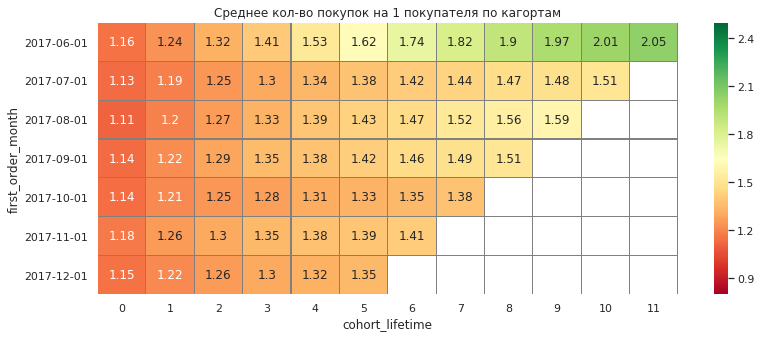

In [67]:
sns.set(style='white')
plt.figure(figsize=(13, 5))
plt.title('Среднее кол-во покупок на 1 покупателя по кагортам')
sns.heatmap(qty_pur_pivot6, annot=True, fmt='.3g',linewidths=0.1, linecolor='gray', vmin=0.8,vmax=2.5, cmap= 'RdYlGn');

Максимальное значение среднего кол-ва покупок в первой кагорте - 2,05, не только потому что она самая долгая. На всем протяжении жизни кагорты #1 её результат был выше остальных кагорт.

In [68]:
qty_pur_pivot6.describe()

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,5.000000,4.000000,3.000000,2.000000,1.000000
mean,1.144824,1.220215,1.277783,1.330818,1.377585,1.418407,1.475964,1.529937,1.610757,1.681615,1.761048,2.048205
std,0.019701,0.026832,0.027634,0.043124,0.073884,0.098106,0.137608,0.168827,0.197025,0.253499,0.353159,NaN
min,1.113136,1.186084,1.249730,1.277285,1.307268,1.330775,1.351163,1.380667,1.471953,1.484898,1.511327,2.048205
25%,1.136325,1.204670,1.256503,1.301895,1.330799,1.364718,1.413798,1.441748,1.501576,1.538576,1.636187,2.048205
50%,1.142960,1.215129,1.268033,1.327259,1.375650,1.388918,1.440351,1.486943,1.534768,1.592255,1.761048,2.048205
75%,1.154452,1.233063,1.295829,1.350106,1.384417,1.427552,1.467009,1.523918,1.643950,1.779974,1.885909,2.048205
max,1.176119,1.264828,1.322051,1.407179,1.529744,1.624615,1.743077,1.816410,1.901538,1.967692,2.010769,2.048205


In [69]:
print('Среднее кол-во покупок на 1 покупателя за полгода "жизни" кагорт -', qty_pur_pivot[5].mean().round(2))

Среднее кол-во покупок на 1 покупателя за полгода "жизни" кагорт - 1.42


3. Посчитаем средний чек

In [70]:
orders

,buy_ts,revenue,uid,first_order_date,first_visit_date,days_between_visit_order,for_calc,first_order_month,order_month,cohort_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,0 days 00:01:00,1,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,0 days 00:11:00,1,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,0 days 00:02:00,1,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,0 days 00:15:00,1,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,0 days 00:27:00,1,2017-06-01,2017-06-01,0
...,...,...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,2018-05-31 09:11:00,0 days 14:39:00,1,2018-05-01,2018-05-01,0
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,2018-05-31 23:05:00,0 days 00:45:00,1,2018-05-01,2018-05-01,0
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-31 23:52:00,0 days 00:02:00,1,2018-05-01,2018-05-01,0
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2017-10-23 12:32:00,220 days 11:24:00,1,2018-05-01,2018-05-01,0


In [71]:
price = orders.groupby('order_month').agg({'buy_ts':'count','revenue':'sum'}).reset_index()
price['av_price'] = price['revenue']/price['buy_ts']
price

,order_month,buy_ts,revenue,av_price
0,2017-06-01,2255,9066.68,4.020701
1,2017-07-01,2270,12099.85,5.330330
2,2017-08-01,1718,8327.43,4.847165
3,2017-09-01,3224,17155.65,5.321231
4,2017-10-01,5411,26450.25,4.888237
5,2017-11-01,5310,24896.38,4.688584
6,2017-12-01,5836,34687.48,5.943708
7,2018-01-01,4450,17940.49,4.031571
8,2018-02-01,4960,24118.66,4.862633
9,2018-03-01,5021,27086.76,5.394694


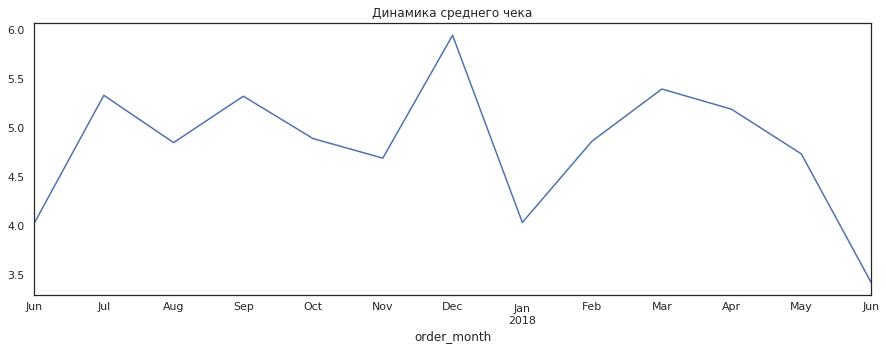

In [72]:
price.plot(y='av_price', x='order_month',figsize=(15,5), title ='Динамика среднего чека', legend=False );

Максимальное значение среднего чека в декабре.

In [73]:
Av_price = (price['revenue'].sum() /price ['buy_ts'].sum()).round()
print('Значение среднего чека:',Av_price,'у.е.')

Значение среднего чека: 5.0 у.е.


4.Посчитаем LTV на покупателя по когортам. 

In [74]:
cohorts['first_order_month'] = pd.to_datetime(cohorts['first_order_month']).dt.date
cohorts['ltv']=cohorts['revenue']/cohorts['cohort_users']

In [75]:
ltv_pivot = cohorts.pivot_table(index='first_order_month', values='ltv', columns='cohort_lifetime', aggfunc='sum').groupby(level=0).cumsum(axis=1)
ltv_pivot.fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.649579,5.13377,5.55268,6.27852,7.17993,7.85624,8.71786,9.11033,9.54269,10.1033,10.6486,10.8988
2017-07-01,6.017082,6.35175,6.9956,7.35634,7.53912,7.70097,7.82499,7.97011,8.13076,8.28338,8.43825,
2017-08-01,5.231655,5.72264,6.18942,6.59064,7.09405,7.38511,7.59905,8.01508,8.31595,8.50871,,
2017-09-01,5.584544,6.73617,7.27442,11.3972,11.8109,12.478,13.2008,13.4512,13.642,,,
2017-10-01,4.927450,5.40015,5.58444,5.71788,5.86677,5.98154,6.0694,6.18902,,,,
2017-11-01,5.046808,5.41402,5.58166,5.87066,6.00984,6.06289,6.16714,,,,,
2017-12-01,4.722445,4.97919,5.94796,7.0656,7.37899,7.72236,,,,,,
2018-01-01,4.124866,4.36631,4.57323,4.70335,4.76204,,,,,,,
2018-02-01,4.138647,4.39295,4.47353,4.52946,,,,,,,,


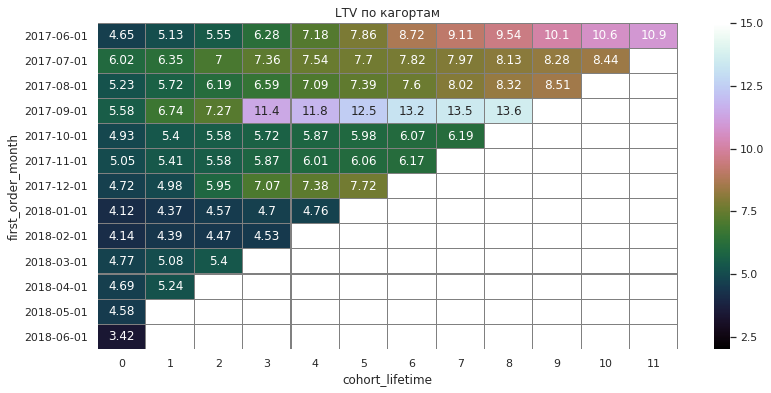

In [76]:
sns.set(style='white')
plt.figure(figsize=(13, 6))
plt.title('LTV по кагортам')
sns.heatmap(ltv_pivot, annot=True, fmt='.3g',linewidths=0.1, linecolor='gray', vmin=2,vmax=15, cmap= 'cubehelix');

In [77]:
print('Накопленный LTV за 6 месяцев "жизни" кагорт:',ltv_pivot.mean()[5].round(2))

Накопленный LTV за 6 месяцев "жизни" кагорт: 7.88


Выводы:
 - С момента первого посещения сайта до совершения покупки в среднем проходит  - 18 мин
 - Среднее количество покупок на одного покупателя за 6 месяцев - 1.42. Первая июньская кагорта показывает лучшие результаты по сравнению с сопоставимыми по сроку жизни кагортами. 
 - Средний чек - 5.0 у.е, максимальное значение было в декабре, минимальное - в январе.
 - Средний LTV по когортам за 6 месяцев - 7,88. Сентябрьская кагорта показывает максимальный LTV c 4 месяца, т.е., с декабря.

### Маркетинг
  
 - Посчитайте общую сумму расходов на маркетинг. Выясните, как траты распределены по источникам. Визуализируйте изменения метрик во времени;
 - Рассчитайте средний CAC на одного покупателя для всего проекта и для каждого источника трафика. Отразите изменения метрик на графиках;
 - Рассчитайте ROMI по когортам в разрезе источников. Сравните окупаемость за одинаковые периоды жизни когорт. Обратите внимание, что клиенты, пришедшие из разных источников, могут иметь разный LTV. Постройте графики, отражающие изменения метрик во времени.


1. Посчитаем расходы на привлечение покупателей:

In [78]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Затраты на привлечение трафика по источникам:
              costs
source_id          
1           20833.0
2           42806.0
3          141322.0
4           61074.0
5           51757.0
9            5517.0
10           5822.0
Затраты итого: 329132.0


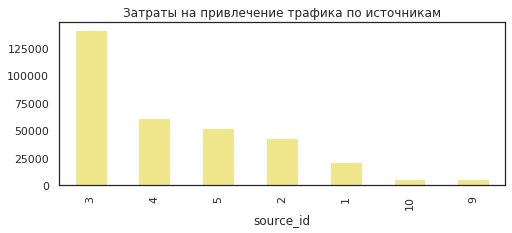

In [79]:
print ('Затраты на привлечение трафика по источникам:')
print (costs.groupby('source_id').agg({'costs':'sum'}).round(0))
print ('Затраты итого:', costs['costs'].sum().round(0))
costs.groupby('source_id').agg({'costs':'sum'}).round(0).sort_values(by='costs',ascending=False).\
plot(kind = 'bar', legend=False, title='Затраты на привлечение трафика по источникам', color = 'khaki', figsize=(8,3));

Затраты на источник #3 выше в несколько раз по сравнению с другими источниками и составляют 42% от общего CAC.

In [80]:
costs['month'] = costs['dt'].astype('datetime64[M]')
costs

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01
...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01
2538,10,2018-05-28,21.26,2018-05-01
2539,10,2018-05-29,11.32,2018-05-01
2540,10,2018-05-30,33.15,2018-05-01


''

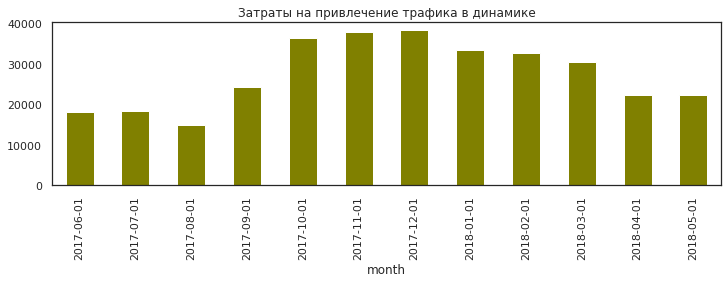

In [81]:
costs['month'] = pd.to_datetime(costs['month']).dt.date
costs.groupby('month').agg({'costs':'sum'}).plot(kind = 'bar', legend=False, title='Затраты на привлечение трафика в динамике', 
                                                 color = 'olive', figsize=(12,3))
;

Затраты имеют сезонность: с октября по март на привлечение покупателей затрачено больше, чем в весенне-летний период

Посторим графики CAC по источникам: 

In [82]:
cost_for_graph = costs.pivot_table(index='month', columns = 'source_id', values ='costs', aggfunc ='sum')

cost_for_graph

source_id,1,2,3,4,5,9,10
month,,,,,,,
2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
2017-11-01,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
2017-12-01,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
2018-01-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
2018-02-01,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88


In [83]:
cost_for_graph.columns = ['source_id 1', 'source_id 2', 'source_id 3', 'source_id 4', 'source_id 5', 'source_id 9', 'source_id 10' ]

In [84]:
cost_for_graph_sum = cost_for_graph.sum(axis=1)
cost_for_graph_sum.name = 'total'
cost_for_graph1 = cost_for_graph.join(cost_for_graph_sum, on = 'month')
cost_for_graph1

,source_id 1,source_id 2,source_id 3,source_id 4,source_id 5,source_id 9,source_id 10,total
month,,,,,,,,
2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22,18015.00
2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82,18240.59
2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57,14790.54
2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67,24368.91
2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24,36322.88
2017-11-01,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36,37907.88
2017-12-01,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86,38315.35
2018-01-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35,33518.52
2018-02-01,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88,32723.03


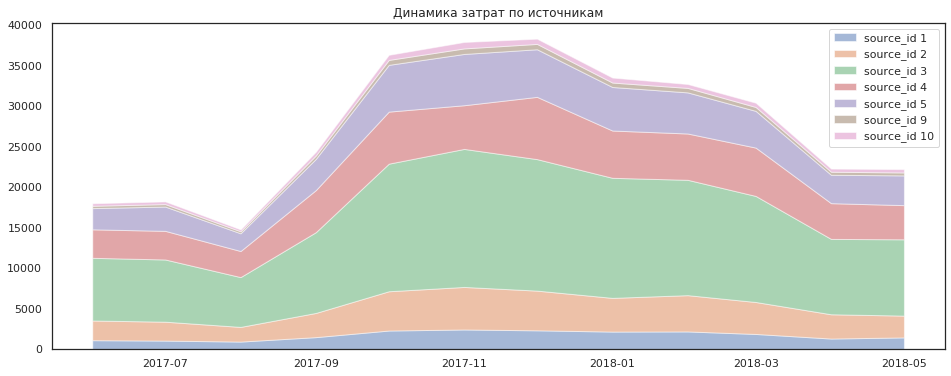

In [85]:

plt.figure(figsize=(16, 6)) 
plt.stackplot(cost_for_graph1.index, [cost_for_graph1['source_id 1'], cost_for_graph1['source_id 2'],cost_for_graph1['source_id 3'],
                                     cost_for_graph1['source_id 4'],cost_for_graph1['source_id 5'], cost_for_graph1['source_id 9'],
                                    cost_for_graph1['source_id 10']], labels=['source_id 1', 'source_id 2','source_id 3', 'source_id 4',
                                    'source_id 5', 'source_id 9', 'source_id 10',], alpha=0.5)

plt.title ('Динамика затрат по источникам')
plt.legend()
plt.show()

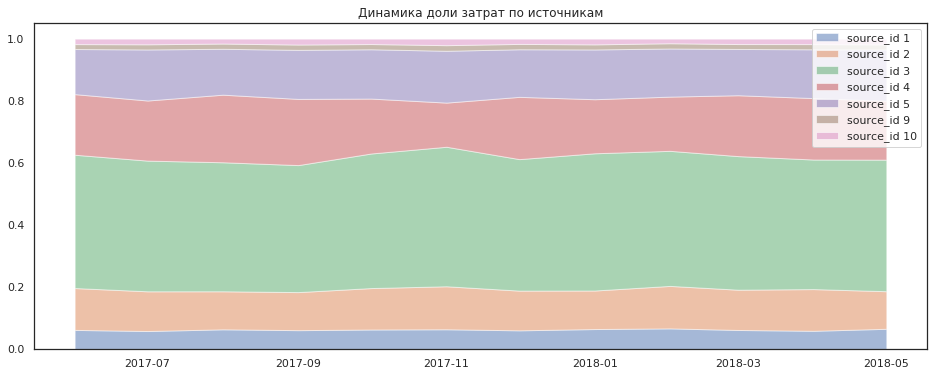

In [86]:
cost_for_graph = cost_for_graph.divide(cost_for_graph.sum(axis=1), axis=0)
plt.figure(figsize=(16, 6)) 
plt.stackplot(cost_for_graph.index, [cost_for_graph['source_id 1'], cost_for_graph['source_id 2'],cost_for_graph['source_id 3'],
                                     cost_for_graph['source_id 4'],cost_for_graph['source_id 5'], cost_for_graph['source_id 9'],
                                    cost_for_graph['source_id 10']], labels=['source_id 1', 'source_id 2','source_id 3', 'source_id 4',
                                    'source_id 5', 'source_id 9', 'source_id 10',], alpha=0.5)

plt.title ('Динамика доли затрат по источникам')
plt.legend()
plt.show()


На графике видно, что в осенний сезон выросли траты на все источники, но на 3 - й в бОльшей степени, его доля в общих затратах максимальная в ноябре. Кроме того 3-й источник самый значительный в абсолютном выражении. А доля трат 4-го источника чуть уменьшилась

2. Рассчитаем CAC на 1 покупателя:

Определим источник, с которого пользоапптель зашел впервые. Его будем брать в расчет при последующих вычислениях CAC и Romi по источникам.

In [87]:
visits

,device,end_ts,source_id,start_ts,uid,year,month,week,date,duration,first_visit_date,first_visit_month,visit_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,2018-02-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09 20:05:00,2018-03-01,2018-05-01,2
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,60,2017-09-03 21:35:00,2017-09-01,2017-09-01,0
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018,1,5,2018-01-30,3360,2017-06-29 09:00:00,2017-06-01,2018-01-01,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017,7,30,2017-07-29,19,2017-07-29 19:07:00,2017-07-01,2017-07-01,0
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018,1,4,2018-01-25,19,2018-01-25 17:38:00,2018-01-01,2018-01-01,0
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018,3,9,2018-03-03,19,2018-03-03 10:12:00,2018-03-01,2018-03-01,0
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017,11,44,2017-11-02,19,2017-11-02 10:12:00,2017-11-01,2017-11-01,0


In [88]:
visits_source = visits.sort_values('start_ts').groupby('uid').agg({'source_id':'first'})#.reset_index()
visits_source

,source_id
uid,
11863502262781,3
49537067089222,2
297729379853735,3
313578113262317,2
325320750514679,5
...,...
18446316582013423015,3
18446403737806311543,5
18446556406699109058,3



Расчет CAC:

In [89]:
cac=orders.join(visits_source,on='uid', how = 'inner')
cac

,buy_ts,revenue,uid,first_order_date,first_visit_date,days_between_visit_order,for_calc,first_order_month,order_month,cohort_lifetime,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,0 days 00:01:00,1,2017-06-01,2017-06-01,0,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,0 days 00:11:00,1,2017-06-01,2017-06-01,0,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,0 days 00:02:00,1,2017-06-01,2017-06-01,0,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,0 days 00:15:00,1,2017-06-01,2017-06-01,0,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,0 days 00:27:00,1,2017-06-01,2017-06-01,0,3
...,...,...,...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,2018-05-31 09:11:00,0 days 14:39:00,1,2018-05-01,2018-05-01,0,4
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,2018-05-31 23:05:00,0 days 00:45:00,1,2018-05-01,2018-05-01,0,10
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-31 23:52:00,0 days 00:02:00,1,2018-05-01,2018-05-01,0,3
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2017-10-23 12:32:00,220 days 11:24:00,1,2018-05-01,2018-05-01,0,3


In [90]:
cac = cac.groupby(['source_id', 'order_month']).agg({'uid':'nunique'}).reset_index()
cac.rename(columns = {'order_month' : 'month'}, inplace = True)


cac

,source_id,month,uid
0,1,2017-06-01,184
1,1,2017-07-01,180
2,1,2017-08-01,119
3,1,2017-09-01,258
4,1,2017-10-01,373
...,...,...,...
80,10,2018-01-01,93
81,10,2018-02-01,125
82,10,2018-03-01,192
83,10,2018-04-01,113


In [91]:
costs

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01
...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01
2538,10,2018-05-28,21.26,2018-05-01
2539,10,2018-05-29,11.32,2018-05-01
2540,10,2018-05-30,33.15,2018-05-01


In [92]:
costs_source1=costs.groupby(['source_id','month']).agg({'costs':'sum'}).reset_index()
costs_source1['month'] = pd.to_datetime(costs_source1['month'], format = '%Y-%m-%d %H:%M:%S')
costs_source1

,source_id,month,costs
0,1,2017-06-01,1125.61
1,1,2017-07-01,1072.88
2,1,2017-08-01,951.81
3,1,2017-09-01,1502.01
4,1,2017-10-01,2315.75
...,...,...,...
79,10,2018-01-01,614.35
80,10,2018-02-01,480.88
81,10,2018-03-01,526.41
82,10,2018-04-01,388.25


In [93]:
cac = pd.merge(cac, costs_source1, how='inner', on=['month','source_id'])


In [94]:
cac.tail(10)

,source_id,month,uid,costs
74,10,2017-08-01,40,232.57
75,10,2017-09-01,87,460.67
76,10,2017-10-01,210,627.24
77,10,2017-11-01,124,792.36
78,10,2017-12-01,89,645.86
79,10,2018-01-01,93,614.35
80,10,2018-02-01,125,480.88
81,10,2018-03-01,192,526.41
82,10,2018-04-01,113,388.25
83,10,2018-05-01,138,409.86


In [95]:
cac['CAC'] = cac['costs'] /cac['uid']

In [96]:
cac_by_source= cac.pivot_table(index='month', columns='source_id',values='CAC', aggfunc ='mean', margins = True).round(2)

In [97]:
cac_by_source

source_id,1,2,3,4,5,9,10,All
month,,,,,,,,
2017-06-01 00:00:00,6.12,10.74,12.57,8.90,6.96,4.46,3.49,7.60
2017-07-01 00:00:00,5.96,11.22,15.50,6.96,7.14,6.05,6.34,8.45
2017-08-01 00:00:00,8.00,13.52,17.07,9.49,6.10,3.95,5.81,9.13
2017-09-01 00:00:00,5.82,11.75,12.79,8.92,6.49,4.20,5.30,7.90
2017-10-01 00:00:00,6.21,11.35,13.31,5.45,5.99,3.93,2.99,7.03
2017-11-01 00:00:00,6.42,11.36,14.04,4.50,8.49,4.12,6.39,7.90
2017-12-01 00:00:00,6.16,11.06,11.92,5.34,7.20,4.57,7.26,7.64
2018-01-01 00:00:00,7.39,12.09,13.94,5.30,7.70,4.89,6.61,8.27
2018-02-01 00:00:00,6.76,12.06,12.00,4.77,6.70,4.56,3.85,7.24


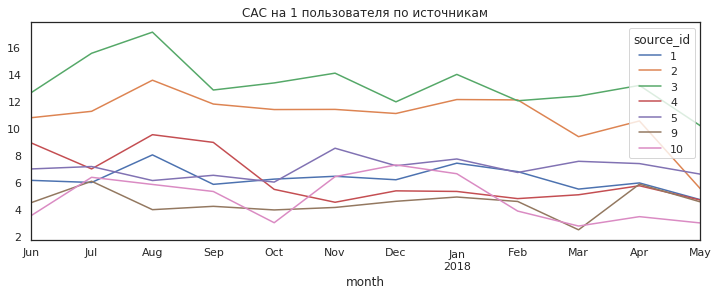

In [98]:
cac.pivot_table(index='month', columns='source_id',values='CAC', aggfunc ='mean').plot(kind = 'line', title='CAC на 1 пользователя по источникам', figsize=(12,4) );

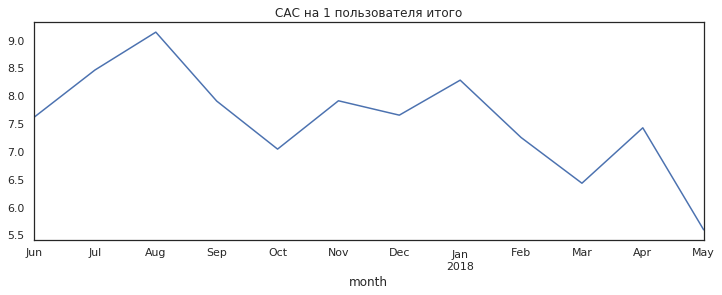

In [99]:
cac_all_source= cac.groupby('month').agg({'CAC':'mean'})
cac_all_source.plot( title='CAC на 1 пользователя итого', figsize=(12,4), legend=False);

Самый высокий CAC в августе (за счет источников № 3,2,4) - по предыдущим графикам видно, что денег потрачено было не много, значит покупателей было очень мало в августе. 

In [100]:
cac_total = (cac['costs']).sum() /(cac['uid']).sum()
print('Суммарный CAC по всем источникам на 1 пользователя:', cac_total.round(2))

Суммарный CAC по всем источникам на 1 пользователя: 8.39


Максимальные затраты на привлечение 1 покупателя приходятся на 3 и 2 источники

3. Рассчитаем ROMI по когортам в разрезе источников. Для этого объединим датасеты с revenue и costs

In [106]:
costs_gr=costs.groupby(['source_id','month']).agg({'costs':'sum'})
costs_gr.reset_index(inplace=True)
costs_gr

,source_id,month,costs
0,1,2017-06-01,1125.61
1,1,2017-07-01,1072.88
2,1,2017-08-01,951.81
3,1,2017-09-01,1502.01
4,1,2017-10-01,2315.75
...,...,...,...
79,10,2018-01-01,614.35
80,10,2018-02-01,480.88
81,10,2018-03-01,526.41
82,10,2018-04-01,388.25


In [107]:
costs_gr['month'] = pd.to_datetime(costs_gr['month'], format = '%Y-%m-%d %H:%M:%S')


In [108]:
source=pd.merge(orders, visits_source, on = 'uid', how = 'inner')
source

,buy_ts,revenue,uid,first_order_date,first_visit_date,days_between_visit_order,for_calc,first_order_month,order_month,cohort_lifetime,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,0 days 00:01:00,1,2017-06-01,2017-06-01,0,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,0 days 00:11:00,1,2017-06-01,2017-06-01,0,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,0 days 00:02:00,1,2017-06-01,2017-06-01,0,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,0 days 00:15:00,1,2017-06-01,2017-06-01,0,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,0 days 00:27:00,1,2017-06-01,2017-06-01,0,3
...,...,...,...,...,...,...,...,...,...,...,...
47744,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,2018-05-31 09:11:00,0 days 14:39:00,1,2018-05-01,2018-05-01,0,4
47745,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,2018-05-31 23:05:00,0 days 00:45:00,1,2018-05-01,2018-05-01,0,10
47746,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-31 23:52:00,0 days 00:02:00,1,2018-05-01,2018-05-01,0,3
47747,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2017-10-23 12:32:00,220 days 11:24:00,1,2018-05-01,2018-05-01,0,3


In [109]:
source = source.groupby(['first_order_month','order_month','source_id', 'cohort_lifetime']).agg({'revenue':'sum','uid':'nunique'})
source.reset_index(inplace=True)

In [110]:
source.columns = ['first_order_month','month','source_id', 'cohort_lifetime', 'revenue', 'n_buyers']
source

,first_order_month,month,source_id,cohort_lifetime,revenue,n_buyers
0,2017-06-01,2017-06-01,1,0,1273.75,184
1,2017-06-01,2017-06-01,2,0,966.73,226
2,2017-06-01,2017-06-01,3,0,2635.24,615
3,2017-06-01,2017-06-01,4,0,1870.57,395
4,2017-06-01,2017-06-01,5,0,1873.67,376
...,...,...,...,...,...,...
509,2018-05-01,2018-05-01,4,0,3284.56,769
510,2018-05-01,2018-05-01,5,0,2047.32,486
511,2018-05-01,2018-05-01,9,0,215.90,58
512,2018-05-01,2018-05-01,10,0,448.29,125


In [114]:
romi = pd.merge(source, costs_gr, on=('month', 'source_id'),how='inner')

In [115]:
romi['ltv'] = romi['revenue'] / romi ['n_buyers']
romi['cac'] = romi['costs'] / romi ['n_buyers']

In [116]:
romi['first_order_month'] = pd.to_datetime(romi['first_order_month']).dt.date
romi['romi']=romi['ltv'] / romi['cac']
romi

,first_order_month,month,source_id,cohort_lifetime,revenue,n_buyers,costs,ltv,cac,romi
0,2017-06-01,2017-06-01,1,0,1273.75,184,1125.61,6.922554,6.117446,1.131609
1,2017-06-01,2017-06-01,2,0,966.73,226,2427.38,4.277566,10.740619,0.398261
2,2017-06-01,2017-06-01,3,0,2635.24,615,7731.65,4.284943,12.571789,0.340838
3,2017-06-01,2017-06-01,4,0,1870.57,395,3514.80,4.735620,8.898228,0.532198
4,2017-06-01,2017-06-01,5,0,1873.67,376,2616.12,4.983165,6.957766,0.716202
...,...,...,...,...,...,...,...,...,...,...
508,2017-10-01,2018-04-01,10,6,4.16,2,388.25,2.080000,194.125000,0.010715
509,2017-11-01,2018-04-01,10,5,6.36,2,388.25,3.180000,194.125000,0.016381
510,2018-02-01,2018-04-01,10,2,0.49,1,388.25,0.490000,388.250000,0.001262
511,2018-03-01,2018-04-01,10,1,7.21,4,388.25,1.802500,97.062500,0.018571


In [117]:
romi_pivot = romi.pivot_table(index='first_order_month', values='romi', columns='cohort_lifetime', aggfunc='mean').cumsum(axis=1)
romi_pivot.fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.659110,0.739125,0.853267,0.950198,1.03092,1.0839,1.15049,1.19164,1.2323,1.28175,1.35438,1.40614
2017-07-01,0.717797,0.829914,0.961885,0.995347,1.01435,1.0291,1.04354,1.05705,1.07777,1.10347,1.12868,
2017-08-01,0.642617,0.679698,0.708723,0.730434,0.753832,0.769104,0.783385,0.818746,0.865617,0.884409,,
2017-09-01,0.662958,0.774411,0.824273,1.09813,1.13805,1.19501,1.27458,1.32574,1.38319,,,
2017-10-01,0.738477,0.808266,0.839173,0.862938,0.890012,0.922781,0.94287,0.972065,,,,
2017-11-01,0.646388,0.684695,0.714354,0.764086,0.787685,0.800596,0.819151,,,,,
2017-12-01,0.584587,0.628934,0.782086,0.984576,1.05277,1.13202,,,,,,
2018-01-01,0.450499,0.474289,0.500394,0.537383,0.547327,,,,,,,
2018-02-01,0.544852,0.588506,0.601263,0.613399,,,,,,,,


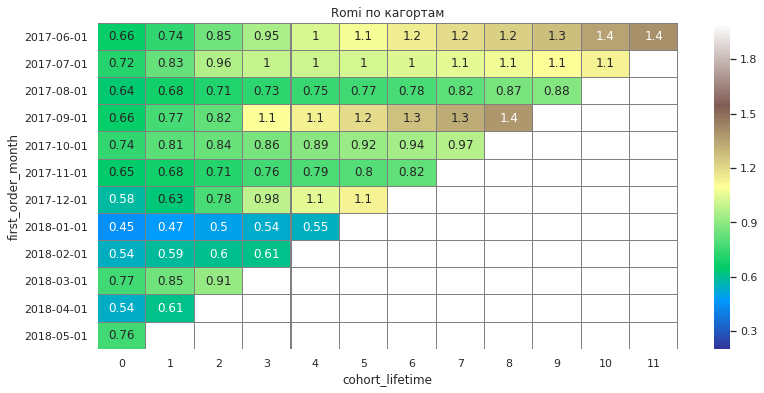

In [118]:
sns.set(style='white')
plt.figure(figsize=(13, 6))
plt.title('Romi по кагортам')
sns.heatmap(romi_pivot, annot=True, fmt='.2g',linewidths=0.05, linecolor='gray', vmin=0.2,vmax=2, cmap= 'terrain');

Время окупаемости кагорт разное, наиболее быстро окупились кагорты сентября и июля - за 4 месяца.
За 6 месяцев "жизни" кагорт окупилось 3 кагорты из 7-ми.

Рассчием ROMI по когортам в разрезе источников

In [119]:
source_uniq = romi['source_id'].unique()


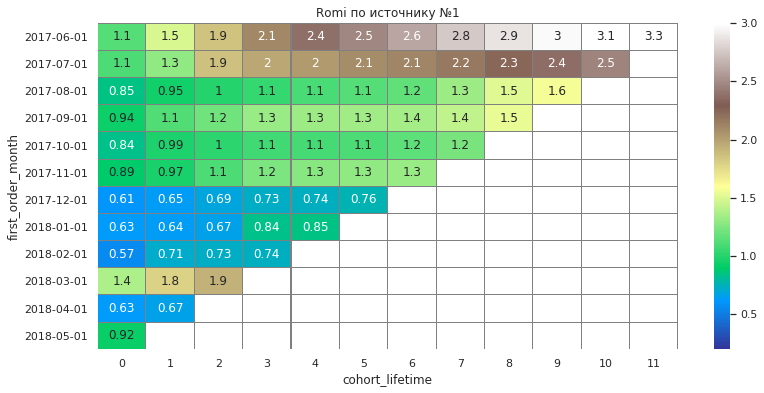

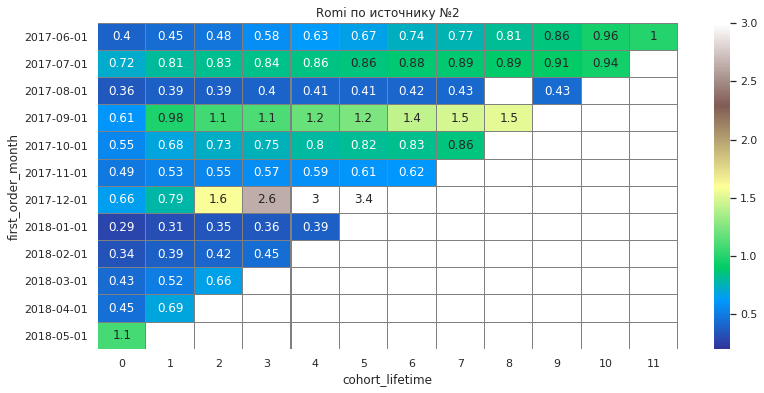

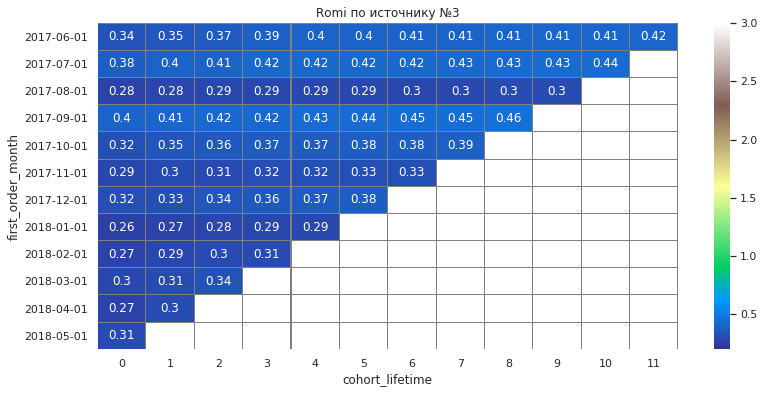

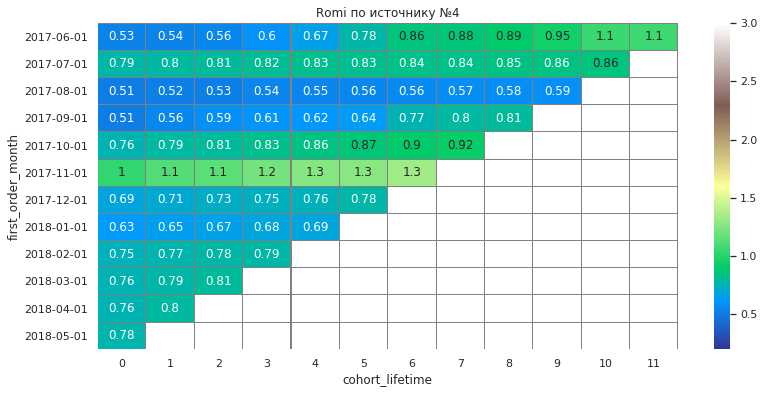

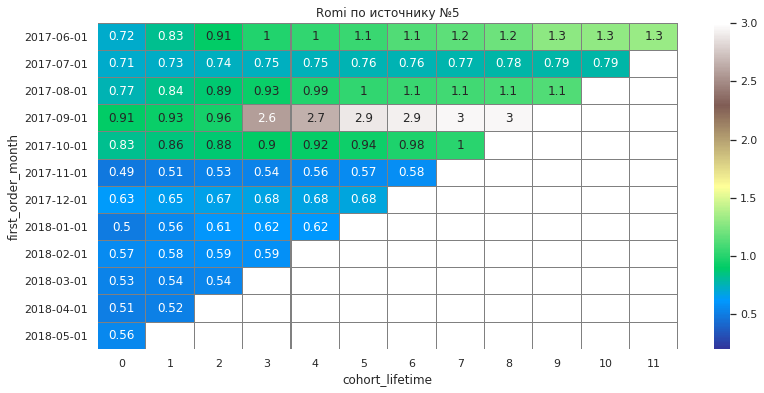

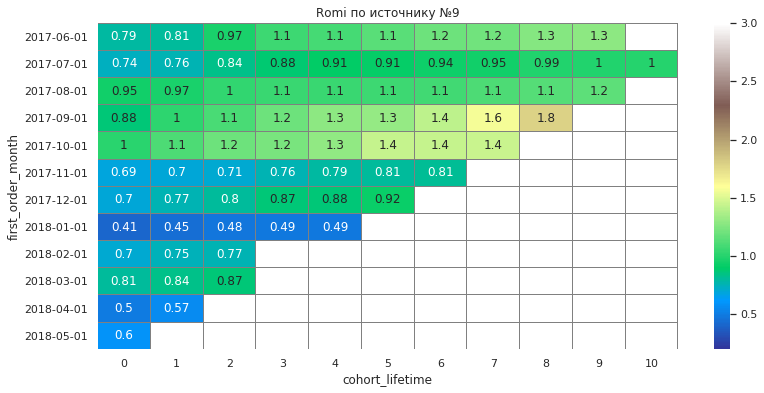

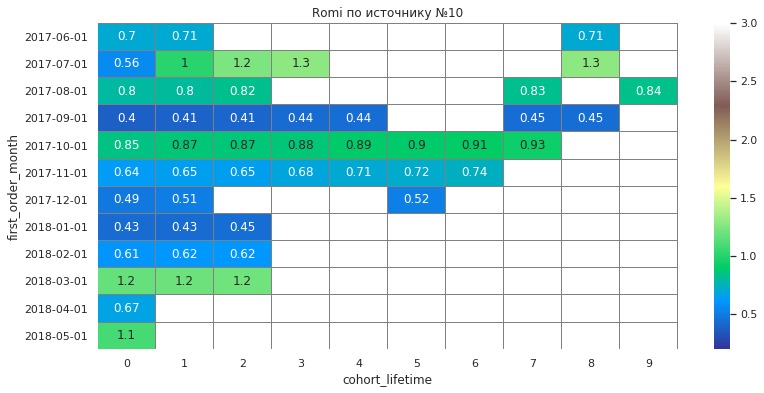

In [120]:
for source in source_uniq:
    romi_pivot =romi.query('@source==source_id').pivot_table(index='first_order_month', values='romi', columns='cohort_lifetime', aggfunc='mean').cumsum(axis=1)

    
    sns.set(style='white')
    plt.figure(figsize=(13, 6))
    plt.title('Romi по источнику №' + str(source))
    sns.heatmap(romi_pivot, annot=True, fmt='.2g',linewidths=0.05, linecolor='gray', vmin=0.2,vmax=3, cmap= 'terrain')
plt.show()

Наиболее перспективный с точки зрения окупаемости источник №1. На источник 5 нужно также обратить внимание - успешность сентябрьской кагорты связана в большей степени с ним.
Пересмотреть неэффективные источники - 3,10

Вывод: 
 - ообщая сумма расходов на маркетинг - 329132 у.е. Источник 3 самый дорогостоящий, составляет 42% от всего бюджета трат. Максимальные траты были в октябре - декабре;
 - средний CAC на одного покупателя - 8,39 у.е. Максимальные затраты (2,2 - 2,6 у.е) на привлечение 1 пользователя приходятся на 3 и 2 источники ;
 - наиболее быстро окупились кагорты сентября и июля - за 4 месяца. За 6 месяцев "жизни" кагорт окупилось 3 кагорты из 7-ми.
 наиболее выгодный источник #1



### Общий вывод

 - Продуктовые метрики:
  - заметна сезонность - больше пользователей заходит на сайт осенью и зимой, обнаружен пик продаж 24 ноября 2017
  - средняя частота посещения сайта в день 1,09, т.е., в течении дня 9% пользователей заходят на сайт повторно;
  - медианное значение длительности одной сессии - 6 минут
  - среднее значение Retantion Rate для 2-го месяца жизни кагорт 6,3%. Дальнейшая тенденция - убывание RR - всё меньше людей возвращаются на сайт с течением времени первого посещения. Более успешные кагорты, где отток меньше всего - июнь-сент. Кагорты начиная с декабря имеют заметно худший retention rate.
  
 - Метрики электронной коммерции:
  - с момента первого посещения сайта до совершения покупки в среднем проходит  - 18 мин
  - среднее количество покупок на одного покупателя за 6 месяцев - 1.42. Первая июньская кагорта показывает лучшие результаты по сравнению с сопоставимыми по сроку жизни кагортами. 
  - средний чек - 5.0 у.е, максимальное значение было в декабре, минимальное - в январе.
  - средний LTV по когортам за 6 месяцев - 7,88. Сентябрьская кагорта показывает максимальный LTV c 4 месяца, т.е., с декабря.
 
 - Маркетинговые метрики:
  - общая сумма расходов на маркетинг - 329132 у.е. Источник 3 самый дорогостоящий, составляет 42% от всего бюджета трат. Максимальные траты были в октябре - декабре;
  - средний CAC на одного покупателя - 8,39 у.е. Максимальные затраты на привлечение 1 пользователя приходятся на 3 и 2 источники, 13,2у.е. и 10,9 у.е. соответственно  ;
  - наиболее быстро окупились кагорты сентября и июля - за 4 месяца. За 6 месяцев "жизни" кагорт окупилось 3 кагорты из 7-ми.
  
- Рекомендации:
 
  
  - наиболее выгодный и быстроокупаемый источник #1. Благодяря кагортам июня, июля, марта;
  - на источник 5 нужно также обратить внимание - успешность сентябрьской кагорты связана в большей степени с ним;
  - ноябрьская кагорта из 4 источника окупилась в первый же месяц, должно быть это связано с пиком продаж 24 ноября. Т.е., данный способ привлечения трафика показал свою эффективность.
  - источник 12 показывает хорошую окупаемость для кагорты декабря.
  - "праздничные" кагорты декабря (источник 2) и марта (источник 1) выходят на окупаемость за счет незначительных затрат.
  - нужно пересмотреть целесообраность трат на неэффективные источники - 3,10. Для источника 3 были слишком большие расходы, которые не оправдались полученным revenue.